# Potência, Energia, Valor médio e RMS

Neste notebook avaliamos a potência, energia, valor médio e RMS de um sinal definidos de acordo com as seguintes equações:

\begin{equation}
P=\frac{1}{t_{2}-t_{1}}\int^{t_{2}}_{t_{1}}|x(t)|^2\mathrm{d}t
\end{equation}

\begin{equation}
E=\int^{t_{2}}_{t_{1}}|x(t)|^2\mathrm{d}t
\end{equation}

\begin{equation}
x_0=\frac{1}{t_{2}-t_{1}}\int^{t_{2}}_{t_{1}}x(t)\mathrm{d}t
\end{equation}

\begin{equation}
x_{\text{RMS}}=\sqrt{\frac{1}{t_{2}-t_{1}}\int^{t_{2}}_{t_{1}}x^2(t)\mathrm{d}t}
\end{equation}

In [1]:
# importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

O valor médio é -5.684e-17
O valor RMS é 0.70692998


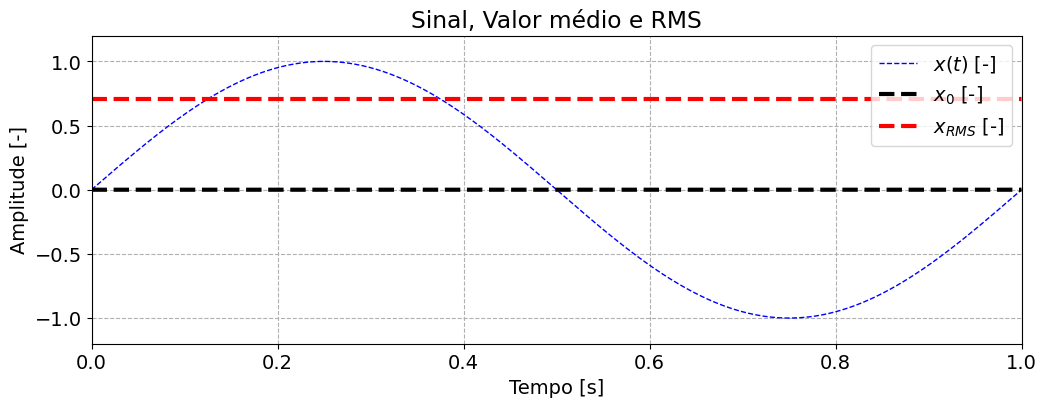

In [13]:
# tempo e frequência
Tp = 1
freq = 1
n_samples = 2000
t = np.linspace(0, Tp, n_samples) # vetor temporal

# sinal senoidal
A = 1
xt = A*np.sin(2*np.pi*freq*t)

# Valor médio
x_0 = np.mean(xt)

# Valor RMS
#x_RMS = np.sqrt(np.mean(xt**2))
x_RMS = np.sqrt((1/len(xt))*np.sum(xt**2))



plt.figure(figsize=(12,4))
plt.title('Sinal, Valor médio e RMS')
plt.plot(t, xt, '--b', linewidth = 1, label = r'$x(t)$ [-]')
plt.plot(t, x_0*np.ones(len(t)), '--k', linewidth = 3, label = r'$x_0$ [-]')
plt.plot(t, x_RMS*np.ones(len(t)), '--r', linewidth = 3, label = r'$x_{RMS}$ [-]')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.ylim((-1.2*A, 1.2*A))
plt.xlim((t[0], t[-1]))
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')

print('O valor médio é {:.4}'.format(x_0))
print('O valor RMS é {:.8}'.format(x_RMS))

# Valor médio e RMS teórico são

\begin{equation}
x_0 = \frac{1}{T_p} \int_{0}^{T_p} A\text{sin}(2 \pi f t) \text{d}t = 0
\end{equation}

\begin{equation}
x_{\text{RMS}} = \sqrt{\frac{1}{T_p} \int_{0}^{T_p} [A\text{sin}(2 \pi f t)]^2 \text{d}t} = \frac{A}{\sqrt{2}}
\end{equation}

In [19]:
print("Theoretical mean value: 0")
print("Theoretical RMS value: {}".format(A/np.sqrt(2)))

Theoretical mean value: 0
Theoretical RMS value: 0.7071067811865475


# Via produto interno

Lembremos que a norma de uma função, $x(t)$, está relacionada ao produto interno: $<x(t), x(t)>$. Logo

\begin{equation}
\left\|x(t)\right\|_2^2 =  <x(t), x(t)> = \int\limits_{0}^{T_p} [A\text{sin}(2 \pi f t)]^2 \text{d}t
\end{equation}

E assim

\begin{equation}
\frac{\left\|x(t)\right\|_2}{T_p} =  \sqrt{\frac{<x(t), x(t)>}{T_p}} = \sqrt{\frac{1}{T_p}\int\limits_{0}^{T_p} [A\text{sin}(2 \pi f t)]^2 \text{d}t} = x_{\text{RMS}}
\end{equation}

In [43]:
x_RMS = np.sqrt((1/len(xt))*np.sum(xt**2))
inner_prod = np.dot(xt, xt)

print("Theoretical RMS value: {:.8f}".format(A/np.sqrt(2)))
print("Summing the squares: {:.8f}".format(x_RMS))
print("Via Inner product: {:.8f}".format(np.sqrt(inner_prod/len(xt))))

Theoretical RMS value: 0.70710678
Summing the squares: 0.70692998
Via Inner product: 0.70692998


# Um sinal aleatório

Para calcular o desvio padrão de uma amostra de $N$ valores, podemos fazer

\begin{equation}
\sigma = \sqrt{\frac{1}{N} \sum\limits_{n = 0}^{N} (x_n - \mu_x)^2}
\end{equation}


Se num sinal discreto calculamos

\begin{equation}
x_{\text{RMS}} = \sqrt{\frac{1}{N} \sum\limits_{n = 0}^{N} x^2[n]}
\end{equation}

podemos imediatamente notar a semalhança

## O valor RMS de um sinal com média nula equivale ao seu desvio padrão

O valor médio especificado é 0. O valor médio calculado é 0.0476014
O valor médio especificado é 1. O valor RMS calculado é 1.009


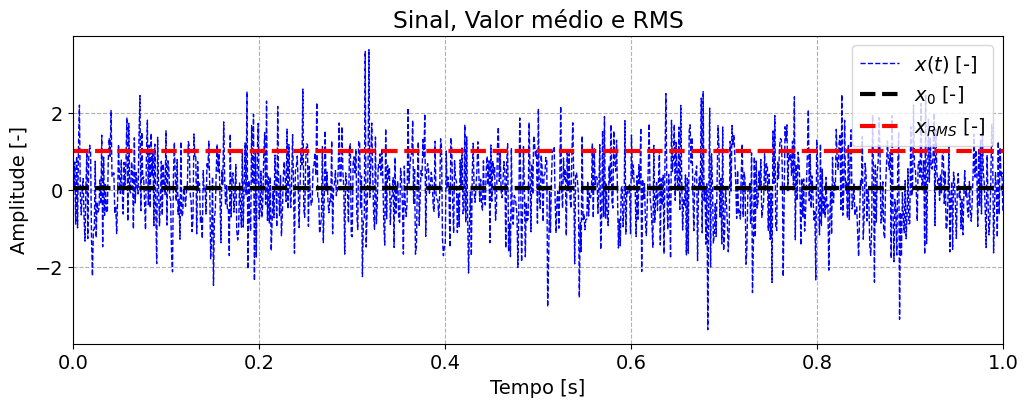

In [60]:
t = np.linspace(0, Tp, 1000) # vetor temporal

mean_spec = 0
std_spec = 1
xt = np.random.normal(loc = mean_spec, scale = std_spec, size = len(t))

# Valor médio
x_0 = np.mean(xt)

# Valor RMS
#x_RMS = np.sqrt(np.mean(xt**2))
x_RMS = np.sqrt((1/len(xt))*np.sum(xt**2))

plt.figure(figsize=(12,4))
plt.title('Sinal, Valor médio e RMS')
plt.plot(t, xt, '--b', linewidth = 1, label = r'$x(t)$ [-]')
plt.plot(t, x_0*np.ones(len(t)), '--k', linewidth = 3, label = r'$x_0$ [-]')
plt.plot(t, x_RMS*np.ones(len(t)), '--r', linewidth = 3, label = r'$x_{RMS}$ [-]')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlim((t[0], t[-1]))
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')

print('O valor médio especificado é {}. O valor médio calculado é {:.6}'.format(mean_spec, x_0))
print('O valor médio especificado é {}. O valor RMS calculado é {:.6}'.format(std_spec, x_RMS))